In [3]:
import argparse
import numpy as np
import tensorflow as tf
import os
from PIL import Image 
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
from models.mini_model import MiniModel
import matplotlib.pyplot as plt

/home/y2p/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
def predict(input_path,config):

	img = Image.open(input_path)
	
	height = config.input_size[0]
	width = config.input_size[1]
	channels = config.input_size[2]

	img = img.resize((width, height), Image.ANTIALIAS)
	img = np.array(img)
	
	plt.imshow(np.asarray(img))
	plt.show(block=False)
	
	img = np.reshape(img,[1,width,height,3])
	
	with tf.Session() as sess:

		model = MiniModel(config)
		model.load(sess)

		pred = sess.run(model.output, feed_dict={model.x: img})
		pred = np.reshape(pred,[pred.shape[1],pred.shape[2]])
		plt.imshow(np.asarray(pred))
		plt.show(block=False)
	return 	pred

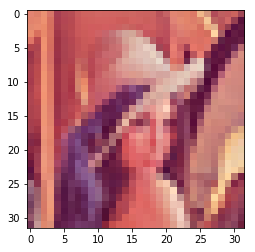

Loading model checkpoint ../experiments/NYU/checkpoint/-1100 ...

INFO:tensorflow:Restoring parameters from ../experiments/NYU/checkpoint/-1100
Model loaded


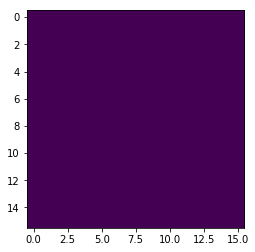

In [ ]:
def main():
	config = process_config('./configs/NYUConfig.json')
	input = './lena.jpeg'
	pred = predict(input,config)
	os._exit(0)

if __name__ == '__main__':
	main()